In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
  #setup markers generator and color map
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))

  z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  z= z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,z,alpha=0.04,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  #plot all samples
  x_test, y_test = X[test_idx,:], y[test_idx]
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha = 0.8, c=cmap(idx), marker=markers[idx], label=cl)

  #highlight test samples
  if test_idx:
    x_test , y_test =  X[test_idx,:], y[test_idx]
    plt.scatter(x_test[:,0], x_test[:,1], c='', alpha = 1.0, linewidth=1, marker='o', s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


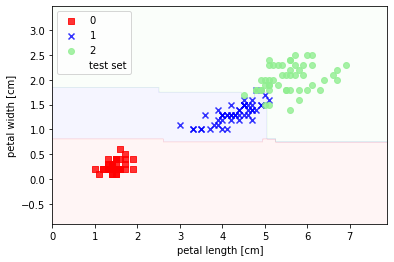

In [3]:
def main():
  iris = datasets.load_iris()
  x_train,x_test,y_train,y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size=0.25, random_state=4)
  clf = RandomForestClassifier(n_estimators=20,max_depth=4)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)

  x_combined=np.vstack((x_train,x_test))
  y_combined=np.hstack((y_train,y_test))

  plot_decision_regions(x_combined, y_combined, classifier=clf, test_idx=range(105,150))
  plt.xlabel('petal length [cm]')
  plt.ylabel('petal width [cm]')
  plt.legend(loc='upper left')
  plt.show()

if __name__ == '__main__':
  main()